<a href="https://colab.research.google.com/github/EkeminiUmanah/EkeminiUmanah.github.io/blob/master/Tutorial_19_Training_Artificial_Neural_Network_using_Google_Colab_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Test whether GPU is working**

In [1]:

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

**Which GPU are we using?**


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 353696208799860427, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 524532712903029226
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16995775224956439115
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15695549568
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12684487735822537798
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

 **RAM Info**

In [3]:
!cat /proc/meminfo

MemTotal:       13333552 kB
MemFree:         9466912 kB
MemAvailable:   11929548 kB
Buffers:           78608 kB
Cached:          2419664 kB
SwapCached:            0 kB
Active:          1130380 kB
Inactive:        2308612 kB
Active(anon):     790584 kB
Inactive(anon):     8552 kB
Active(file):     339796 kB
Inactive(file):  2300060 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2464 kB
Writeback:             0 kB
AnonPages:        940708 kB
Mapped:           577352 kB
Shmem:              9168 kB
Slab:             173812 kB
SReclaimable:     127220 kB
SUnreclaim:        46592 kB
KernelStack:        4560 kB
PageTables:         8364 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    3431312 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              928 kB
AnonHugePages:   

In [4]:
!pip install -q keras

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ANN/Churn_Modelling.csv')

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[ :, 13]

In [10]:
#Create dummy variables
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [11]:
## Concatenate the Data Frames
X = pd.concat([X, geography, gender], axis=1)

In [12]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Part 2 - Now let's make the ANN!**

In [15]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [16]:
# Initialising the ANN
classifier = Sequential()

In [17]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units =10, kernel_initializer = 'he_normal', activation = 'relu', input_dim = 11))
classifier.add(Dropout(0.3))

In [18]:
# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.4))

In [19]:
# Adding the third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.2))

In [20]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [21]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [22]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 5ms/step - loss: 0.5927 - accuracy: 0.7466 - val_loss: 0.4959 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5229 - accuracy: 0.7888 - val_loss: 0.4752 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4986 - accuracy: 0.7934 - val_loss: 0.4657 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4841 - accuracy: 0.7974 - val_loss: 0.4493 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4685 - accuracy: 0.8022 - val_loss: 0.4327 - val_accuracy: 0.7959
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4577 - accuracy: 0.8078 - val_loss: 0.4281 - val_accuracy: 0.7993
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4468 - accuracy: 0.8123 - val_loss: 0.4159 - val_accuracy: 0.8084

In [24]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


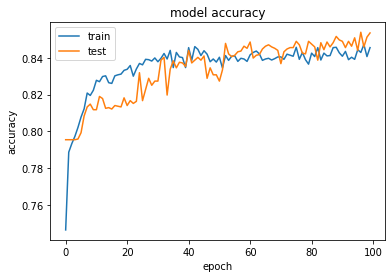

In [25]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

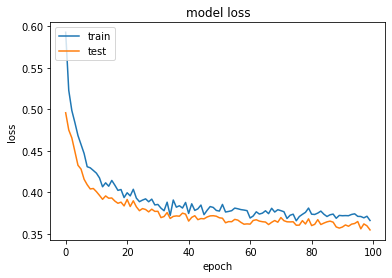

In [26]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

**Part 3 - Making the predictions and evaluating the model**

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1554,   41],
       [ 219,  186]])

In [29]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.87